Task 1: Exploratory Data Analysis (EDA):

Load the dataset and perform basic data exploration.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
print("shape of the dataset:", df.shape)

shape of the dataset: (178, 14)


In [4]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

Examine the distribution of features using histograms, box plots, or density plots.

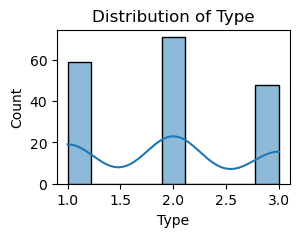

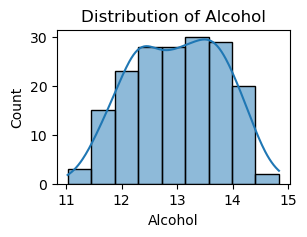

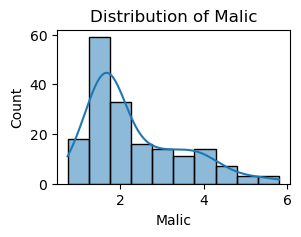

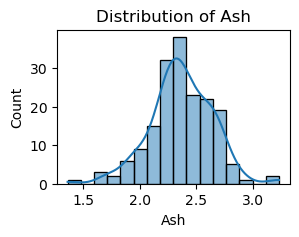

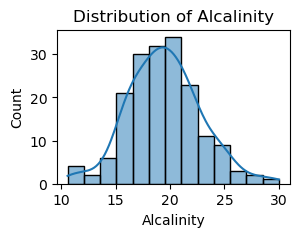

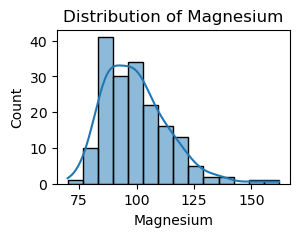

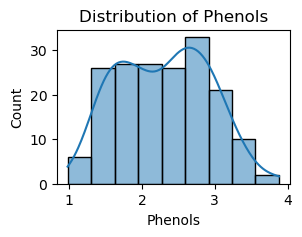

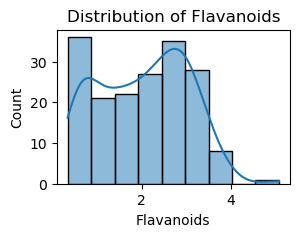

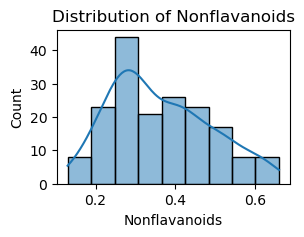

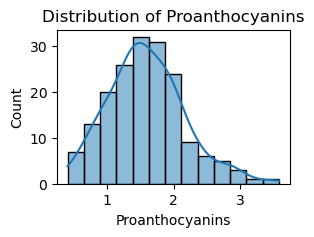

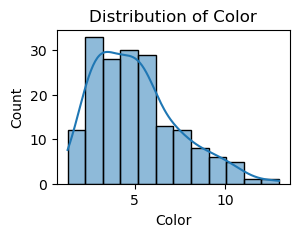

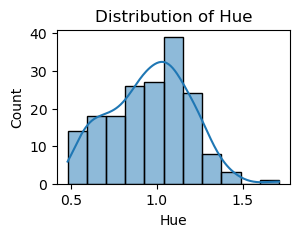

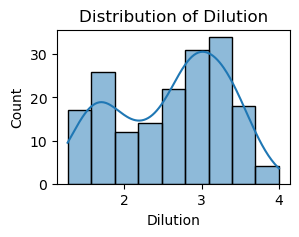

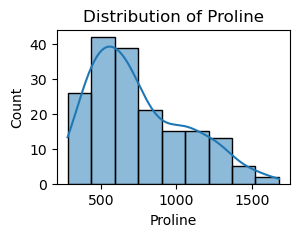

In [5]:
# Visualize distributions
for column in df.columns:
    plt.figure(figsize=(3,2))
    sns.histplot(df[column], kde = True)
    plt.title(f"Distribution of {column}")
    plt.show()

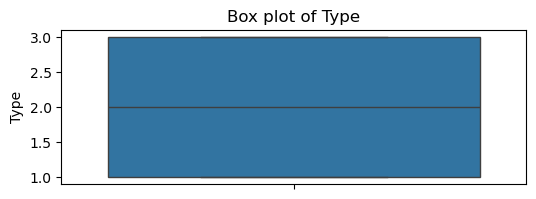

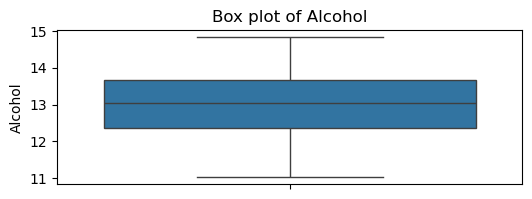

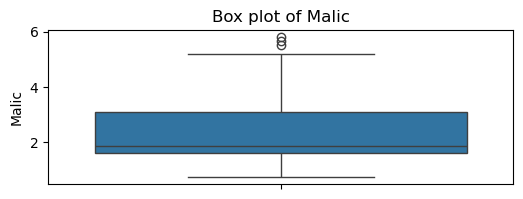

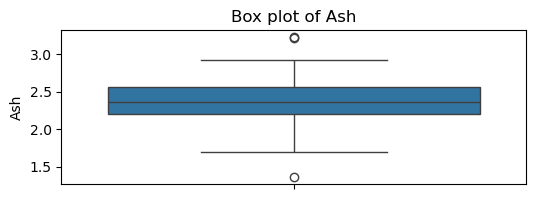

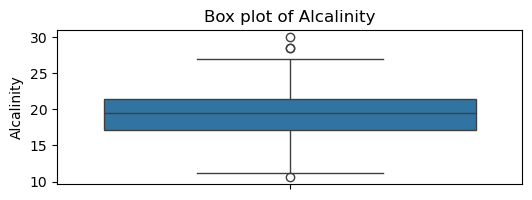

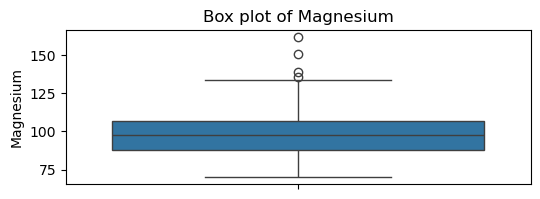

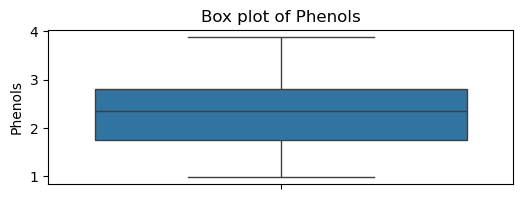

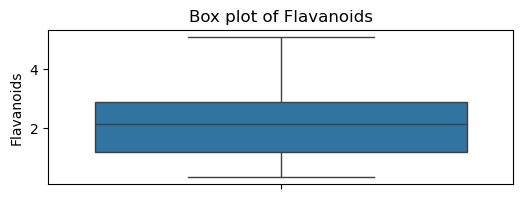

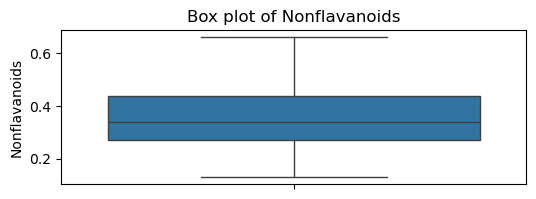

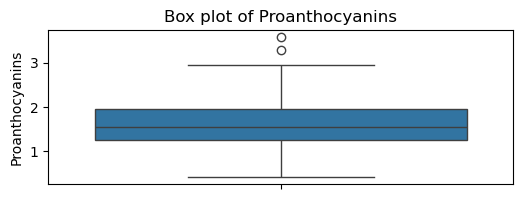

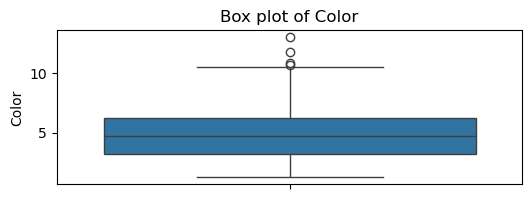

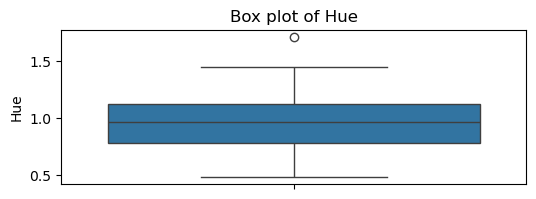

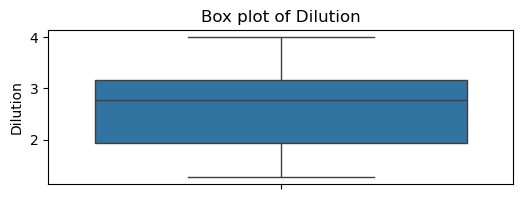

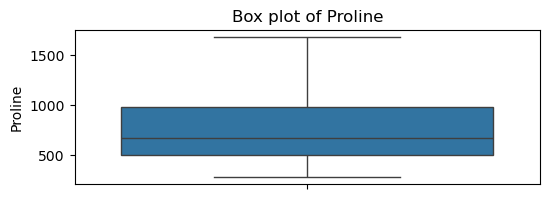

In [6]:
# Box plots for outlier detection
for column in df.columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(y=df[column])
    plt.title(f"Box plot of {column}")
    plt.show()

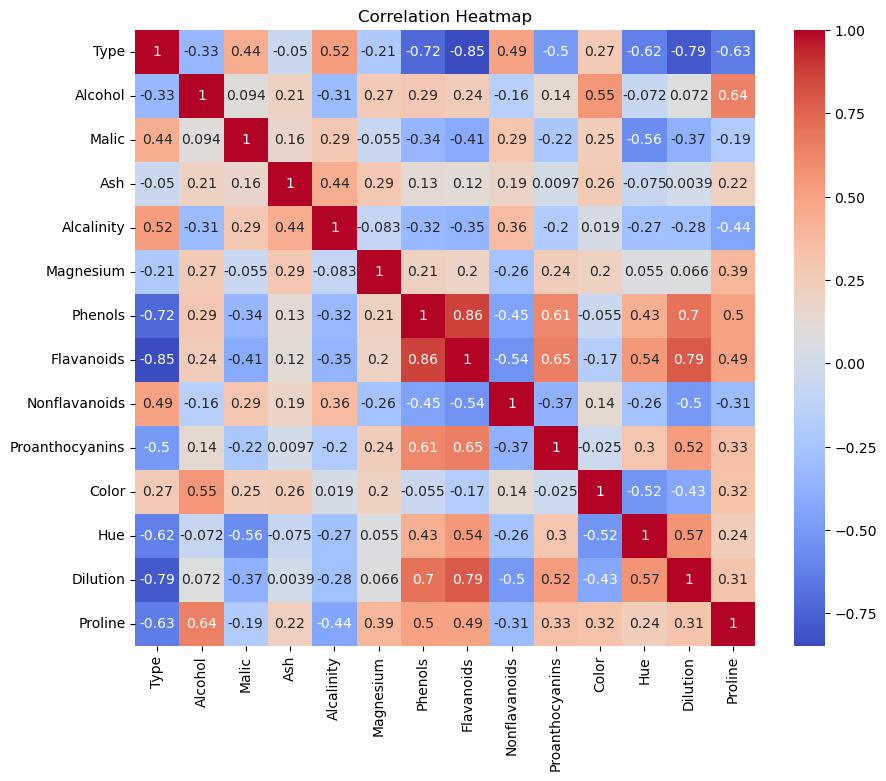

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Task 2: Dimensionality Reduction with PCA:

Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 
feature = df.columns
scaler = StandardScaler()
data_scaler = scaler.fit_transform(df[feature])


In [9]:
# Apply PCA
pca = PCA()
pca.fit(data_scaler)

PCA()

Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

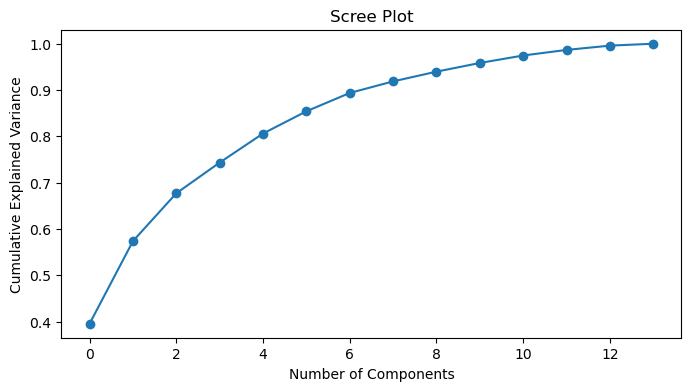

In [10]:
# Scree plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

Transform the original dataset into the principal components.

In [11]:
# Choose number of components (e.g., 95% variance)
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f'Optimal number of components: {n_components}')

# Transform data
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaler)

Optimal number of components: 10


Task 3: Clustering with Original Data:

Apply a clustering algorithm (e.g., K-means) to the original dataset.

Visualize the clustering results using appropriate plots.

Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


c:\Users\patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


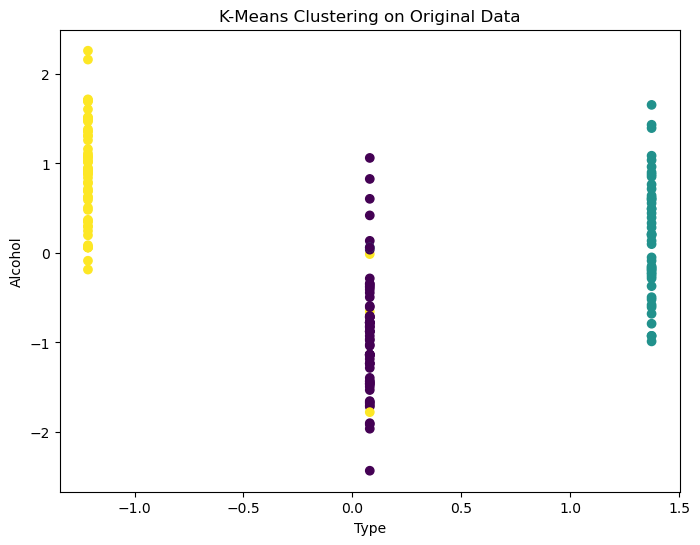

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Apply K-Means
k = 3  # choose number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels_original = kmeans.fit_predict(data_scaler)

# Evaluation
sil_score = silhouette_score(data_scaler, labels_original)
db_score = davies_bouldin_score(data_scaler, labels_original)
print(f'Silhouette Score (Original Data): {sil_score}')
print(f'Davies-Bouldin Index (Original Data): {db_score}')

# Visualization (using first two features for simplicity)
plt.figure(figsize=(8,6))
plt.scatter(data_scaler[:,0], data_scaler[:,1], c=labels_original, cmap='viridis')
plt.title('K-Means Clustering on Original Data')
plt.xlabel(feature[0])
plt.ylabel(feature[1])
plt.show()

Task 4: Clustering with PCA Data:

Apply the same clustering algorithm to the PCA-transformed dataset.

Visualize the clustering results obtained from PCA-transformed data.

Compare the clustering results from PCA-transformed data with those from the original dataset.

c:\Users\patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (PCA Data): 0.32292055407233
Davies-Bouldin Index (PCA Data): 1.2578453408449182


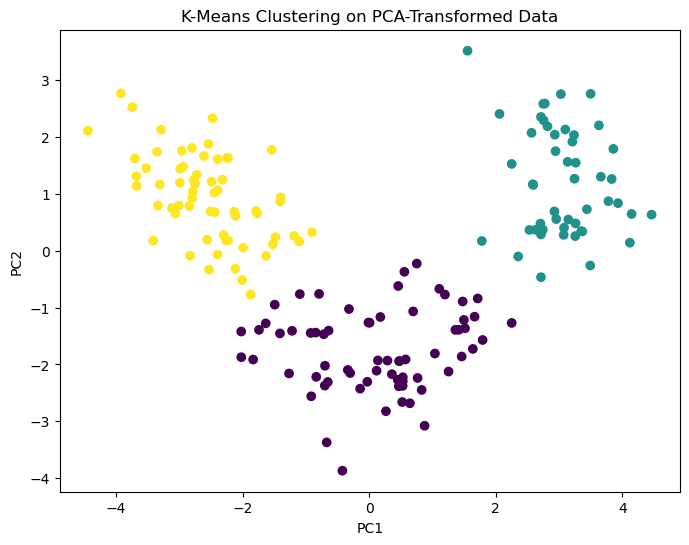

In [13]:
# Apply K-Means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=k, random_state=42)
labels_pca = kmeans_pca.fit_predict(data_pca)

# Evaluation
sil_score_pca = silhouette_score(data_pca, labels_pca)
db_score_pca = davies_bouldin_score(data_pca, labels_pca)
print(f'Silhouette Score (PCA Data): {sil_score_pca}')
print(f'Davies-Bouldin Index (PCA Data): {db_score_pca}')

# Visualization (using first two principal components)
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels_pca, cmap='viridis')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Task 5: Comparison and Analysis:

Compare silhouette scores and Davies–Bouldin indices of original vs PCA data.

Observe cluster separation in scatter plots.

Discuss:

Whether PCA improved clustering performance.

Trade-offs: dimensionality reduction reduces noise and speeds up clustering but may lose interpretability.

Task 6: Conclusion and Insights

Key Findings:

PCA can reduce dimensionality while retaining most variance.

Clustering on PCA data may be faster and sometimes cleaner if features are correlated.

Practical Implications:

Use PCA when dealing with high-dimensional data.

Use original data when interpretability of features is important.

Recommendation:

Apply PCA for visualization and efficiency.

Apply clustering directly on original data if feature meaning is crucial.